# Experimental Analysis - Genetic SR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Dataset: SYNTH1
### 1. Population Size

30 executions of the algorithm for population size = [50, 100, 250, 500] fixing the parameters on 300 generations, tournament selection with k = 2, elitism of size 1, crossover probability = 0.90 and mutation probability = 0.05.

In [2]:
res_base_path = '../src/results/'

**Lowest Fitness Graph**

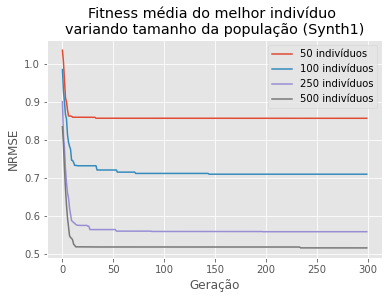

In [3]:
lowest_50 = pd.read_csv(res_base_path + 'pop50/lowest_fitness.csv', header=None)
lowest_50.iloc[0].plot(label='50 indivíduos')

lowest_100 = pd.read_csv(res_base_path + 'pop100/lowest_fitness.csv', header=None)
lowest_100.iloc[0].plot(label='100 indivíduos')

lowest_250 = pd.read_csv(res_base_path + 'pop250/lowest_fitness.csv', header=None)
lowest_250.iloc[0].plot(label='250 indivíduos')

lowest_500 = pd.read_csv(res_base_path + 'pop500/lowest_fitness.csv', header=None)
lowest_500.iloc[0].plot(label='500 indivíduos')

plt.title('Fitness média do melhor indivíduo \nvariando tamanho da população (Synth1)')
plt.xlabel('Geração')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

**Convergency**

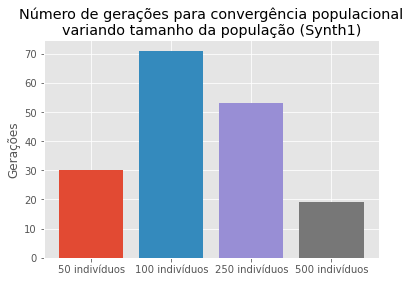

In [4]:
generations_to_converge = [30,71,53,19]
plt.bar('50 indivíduos',generations_to_converge[0])
plt.bar('100 indivíduos',generations_to_converge[1])
plt.bar('250 indivíduos',generations_to_converge[2])
plt.bar('500 indivíduos',generations_to_converge[3])
plt.title('Número de gerações para convergência populacional\nvariando tamanho da população (Synth1)')
plt.ylabel('Gerações')
plt.show()

### 2. Genetic Operators

Fixando tamanho da população = 250, número de gerações = 200 e variando Probabilidade de crossover (pc) e Probabilidade de mutação (pm). Configurações consideradas:

pc = 0.90 e pm = 0.05

pc = 0.75 e pm = 0.20

pc = 0.60 e pm = 0.30

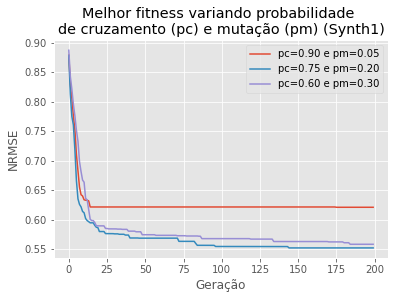

In [10]:
pc90pm5 = pd.read_csv(res_base_path + 'pc90pm5/lowest_fitness.csv', header=None)
pc90pm5.iloc[0].plot(label='pc=0.90 e pm=0.05')

pc75pm20 =  pd.read_csv(res_base_path + 'pc75pm20/lowest_fitness.csv', header=None)
pc75pm20.iloc[0].plot(label='pc=0.75 e pm=0.20')

pc60pm30 =  pd.read_csv(res_base_path + 'pc60pm30/lowest_fitness.csv', header=None)
pc60pm30.iloc[0].plot(label='pc=0.60 e pm=0.30')

plt.title('Melhor fitness variando probabilidade \nde cruzamento (pc) e mutação (pm) (Synth1)')
plt.xlabel('Geração')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

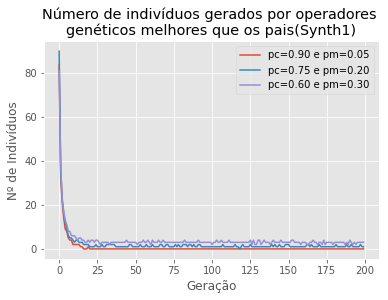

In [16]:
directories = ['pc90pm5/', 'pc75pm20/', 'pc60pm30/']
labels = ['pc=0.90 e pm=0.05', 'pc=0.75 e pm=0.20', 'pc=0.60 e pm=0.30']
for i, dir_ in enumerate(directories):
    file = res_base_path + dir_ + 'better_children.csv'
    df = pd.read_csv(file, header=None)
    df = df.round(0).astype(int)
    df.iloc[0].plot(label=labels[i])

plt.title('Número de indivíduos gerados por operadores \ngenéticos melhores que os pais(Synth1)')
plt.xlabel('Geração')
plt.ylabel('Nº de Indivíduos')
plt.legend()
plt.show()

### 3. Elitismo

Fixando probabilidades em pc=0.75 e pm=0.20 e removendo elitismo.

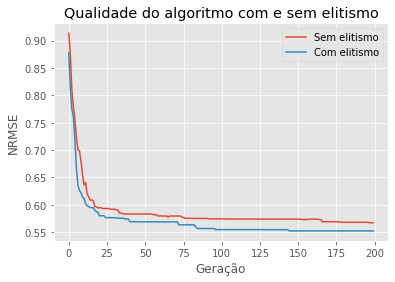

In [30]:
pc75pm20_no_elitism = pd.read_csv(res_base_path + 'pc75pm20_no_elitism/lowest_fitness.csv', header=None)
pc75pm20_no_elitism.iloc[0].plot(label='Sem elitismo')

pc75pm20 = pd.read_csv(res_base_path + 'pc75pm20/lowest_fitness.csv', header=None)
pc75pm20.iloc[0].plot(label='Com elitismo')

plt.title('Qualidade do algoritmo com e sem elitismo')
plt.xlabel('Geração')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

### 4. Aumentando diversidade da população e Seleção por Roleta

Visando aumentar diversidade da população, fixamos os parâmetros anteriores e alteramos o código para retornar um pai e um filho quando os dois filhos gerados são iguais.

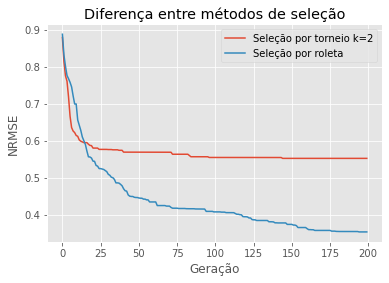

In [31]:
pc75pm20 = pd.read_csv(res_base_path + 'pc75pm20/lowest_fitness.csv', header=None)
pc75pm20.iloc[0].plot(label='Seleção por torneio k=2')

pc75pm20_roulette = pd.read_csv(res_base_path + 'pc75pm20_roulette/lowest_fitness.csv', header=None)
pc75pm20_roulette.iloc[0].plot(label='Seleção por roleta')

plt.title('Diferença entre métodos de seleção')
plt.xlabel('Geração')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

### 5. Melhor indivíduo

In [32]:
df = pd.read_csv(res_base_path + 'synth1_best/best_ind.csv', header=None)

In [39]:
expr = df[1].iloc[0]
expr

'((x*x)*(((x*x)--0.12669046065726164)-x))'

In [46]:
import numpy as np

In [43]:
class TestData:
    def __init__(self, train_file):
        df = pd.read_csv(train_file, header=None)
        self.X = df[0].to_numpy()
        self.Y = df[1].to_numpy()
        self.Fxy = df[2].to_numpy()

In [48]:
def get_RMSE(expr, test_data):
        size = np.size(test_data.X)
        Fxy_ = np.zeros(size)
        for i in range(size):
            x = test_data.X[i]
            y = test_data.Y[i]
            try:
                Fxy_[i] = eval(expr)
            except:
                Fxy_[i] = 0
        np.nan_to_num(Fxy_, copy=False, nan=0.0, posinf=0.0, neginf=0.0)
        sum_ = np.sum(np.power((Fxy_ - test_data.Fxy), 2))
        mean = np.mean(test_data.Fxy)
        norm = np.sum(np.power((test_data.Fxy - mean), 2))
        return np.sqrt(sum_ / norm)

In [49]:
test_data = TestData("../datasets/synth1/synth1-test.csv")
print(get_RMSE(expr, test_data))

0.08884969502277729
